In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score,recall_score,roc_auc_score,accuracy_score,classification_report,confusion_matrix


In [130]:
data = pd.read_csv(r'E:\python projects\Datasets\flight_delay_prediction.csv')
data.head()

flight_id    airline origin destination  departure_hour  day_of_week  \
0          1     Spirit    LAX         JFK               1            1   
1          2  Southwest    SEA         DEN               6            7   
2          3    JetBlue    ORD         SEA              14            6   
3          4     Spirit    DEN         JFK              13            1   
4          5   American    DFW         JFK              12            2   

   scheduled_duration_min  distance_km weather_severity  holiday  delayed  
0                     320          472             Rain        0        0  
1                      65         3537             Rain        0        0  
2                     250         2215            Clear        0        0  
3                     242         3748            Clear        0        0  
4                     270          539            Clear        0        0

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   flight_id               50000 non-null  int64 
 1   airline                 50000 non-null  object
 2   origin                  50000 non-null  object
 3   destination             50000 non-null  object
 4   departure_hour          50000 non-null  int64 
 5   day_of_week             50000 non-null  int64 
 6   scheduled_duration_min  50000 non-null  int64 
 7   distance_km             50000 non-null  int64 
 8   weather_severity        50000 non-null  object
 9   holiday                 50000 non-null  int64 
 10  delayed                 50000 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 4.2+ MB


In [132]:
data.duplicated().sum()

np.int64(0)

In [133]:
data.isnull().sum()

flight_id                 0
airline                   0
origin                    0
destination               0
departure_hour            0
day_of_week               0
scheduled_duration_min    0
distance_km               0
weather_severity          0
holiday                   0
delayed                   0
dtype: int64

In [134]:
data.describe()

flight_id  departure_hour   day_of_week  scheduled_duration_min  \
count  50000.000000    50000.000000  50000.000000             50000.00000   
mean   25000.500000       11.509700      3.981880               209.85552   
std    14433.901067        6.914632      1.996725                86.43678   
min        1.000000        0.000000      1.000000                60.00000   
25%    12500.750000        6.000000      2.000000               135.00000   
50%    25000.500000       12.000000      4.000000               210.00000   
75%    37500.250000       17.000000      6.000000               284.00000   
max    50000.000000       23.000000      7.000000               359.00000   

        distance_km       holiday       delayed  
count  50000.000000  50000.000000  50000.000000  
mean    2147.936620      0.150940      0.228800  
std     1068.219184      0.357994      0.420064  
min      300.000000      0.000000      0.000000  
25%     1223.000000      0.000000      0.000000  
50%     2149.000000      0.000000      0.000000  
75%     3072.000000      0.000000      0.000000  
max     3999.000000      1.000000      1.000000

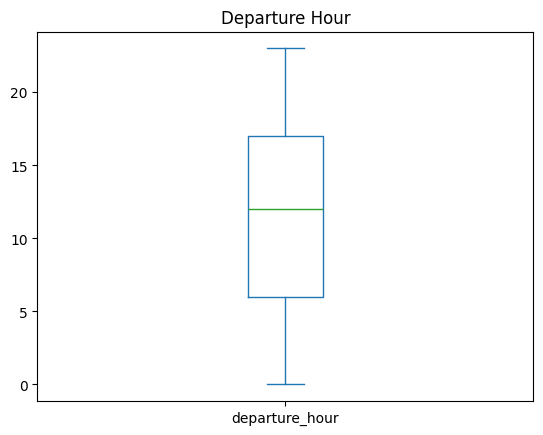

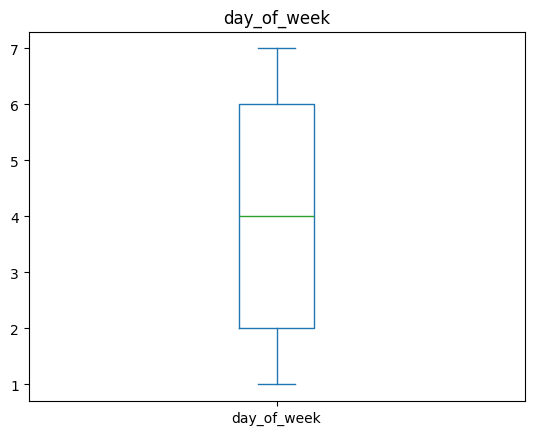

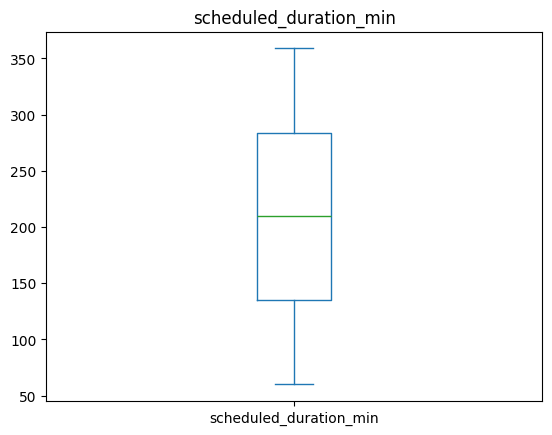

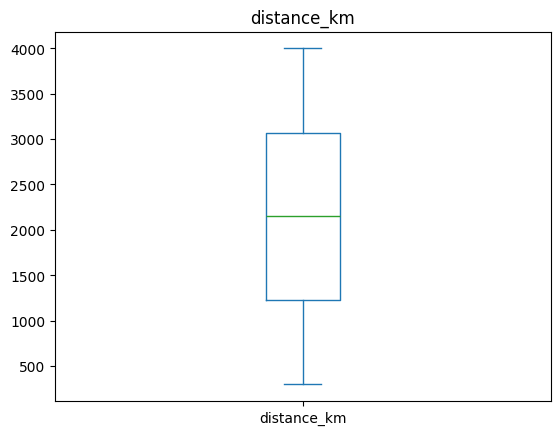

In [135]:
data['departure_hour'].plot(kind='box', title='Departure Hour')
plt.show()
data['day_of_week'].plot(kind='box', title='day_of_week')
plt.show()
data['scheduled_duration_min'].plot(kind='box', title='scheduled_duration_min')
plt.show()
data['distance_km'].plot(kind='box', title='distance_km')

plt.show()

# no outliers (using boxplot , and differances between percentile(0.25) & minimum = differances between percentile(0.75) & maximum) 

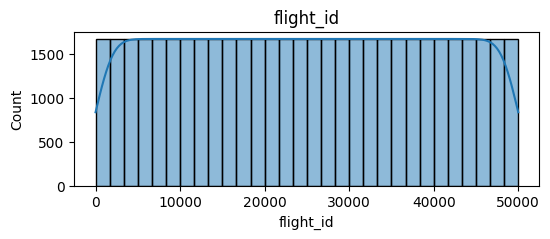

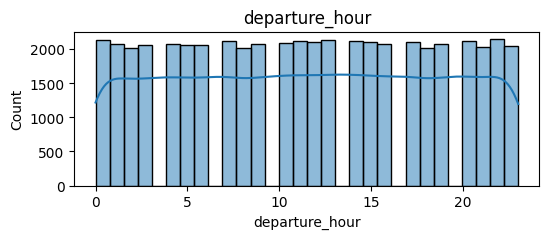

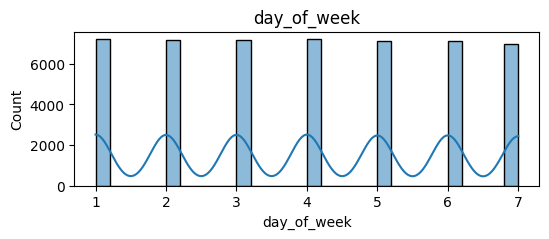

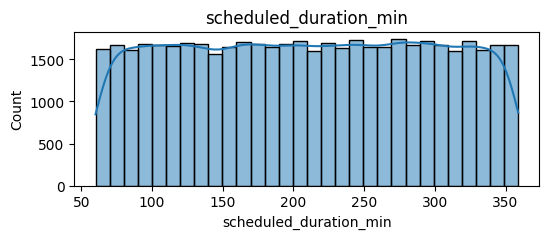

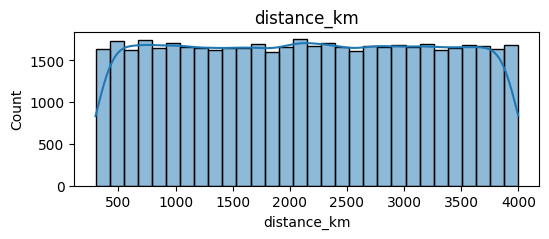

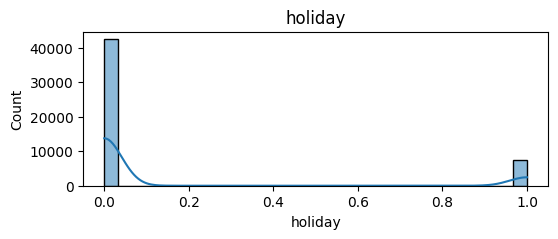

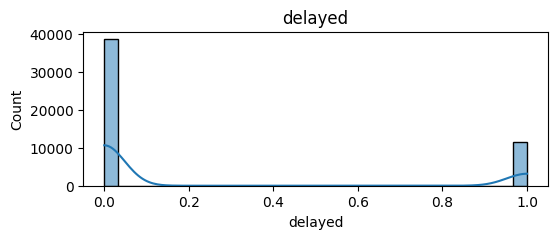

In [136]:
for col in data.select_dtypes(include='number').columns:
    plt.figure(figsize=(6,2))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(col)
    plt.show()

In [137]:
data.corr(numeric_only=True)

flight_id  departure_hour  day_of_week  \
flight_id                1.000000        0.001266    -0.000103   
departure_hour           0.001266        1.000000    -0.007858   
day_of_week             -0.000103       -0.007858     1.000000   
scheduled_duration_min   0.006374       -0.002705     0.001838   
distance_km             -0.002887        0.001878    -0.005475   
holiday                 -0.007613       -0.001807     0.006233   
delayed                  0.001039        0.054481    -0.002568   

                        scheduled_duration_min  distance_km   holiday  \
flight_id                             0.006374    -0.002887 -0.007613   
departure_hour                       -0.002705     0.001878 -0.001807   
day_of_week                           0.001838    -0.005475  0.006233   
scheduled_duration_min                1.000000    -0.010054  0.005944   
distance_km                          -0.010054     1.000000  0.002645   
holiday                               0.005944     0.002645  1.000000   
delayed                               0.005532     0.003147  0.077970   

                         delayed  
flight_id               0.001039  
departure_hour          0.054481  
day_of_week            -0.002568  
scheduled_duration_min  0.005532  
distance_km             0.003147  
holiday                 0.077970  
delayed                 1.000000

In [138]:
num_flights_by_airline= data['airline'].value_counts()
num_flights_by_airline.sort_values(ascending=False)

airline
JetBlue      7307
Spirit       7250
United       7165
Southwest    7155
Alaska       7071
Delta        7070
American     6982
Name: count, dtype: int64

In [141]:
num_delayed_flights_by_airline= data.groupby('airline')['delayed'].sum()
num_delayed_flights_by_airline.sort_values(ascending=False)

airline
Spirit       1725
JetBlue      1693
Delta        1628
United       1621
Southwest    1613
Alaska       1594
American     1566
Name: delayed, dtype: int64

In [ ]:
airlines_by_distance= data.groupby('airline')['distance_km'].sum()
airlines_by_distance.sort_values(ascending=False)

airline
JetBlue      15773449
Spirit       15567981
United       15486279
Southwest    15397430
Alaska       15100111
Delta        15037381
American     15034200
Name: distance_km, dtype: int64

In [ ]:
airlines_by_duration = data.groupby('airline')['scheduled_duration_min'].sum()
airlines_by_duration.sort_values(ascending=False)

airline
Spirit       1527252
JetBlue      1515510
United       1507566
Southwest    1505129
Delta        1490807
Alaska       1488742
American     1457770
Name: scheduled_duration_min, dtype: int64

In [ ]:
speed_by_airline = airlines_by_distance / airlines_by_duration
speed_by_airline.sort_values(ascending=False)

airline
JetBlue      10.408014
American     10.313150
United       10.272372
Southwest    10.229974
Spirit       10.193459
Alaska       10.142866
Delta        10.086739
dtype: float64

In [ ]:
origin_fligts = data.groupby('origin')['delayed'].sum()
origin_fligts.sort_values(ascending=False)

origin
LAX    1508
JFK    1460
ORD    1442
DEN    1438
SEA    1412
ATL    1410
DFW    1389
SFO    1381
Name: delayed, dtype: int64

In [ ]:
destination_flights = data.groupby('destination')['delayed'].sum()
destination_flights.sort_values(ascending=False)

destination
DFW    1473
LAX    1473
JFK    1452
ORD    1433
DEN    1422
SEA    1416
SFO    1401
ATL    1370
Name: delayed, dtype: int64

In [ ]:
day_of_week_flights = data['day_of_week'].value_counts()
day_of_week_flights

day_of_week
1    7223
4    7217
3    7185
2    7174
6    7111
5    7098
7    6992
Name: count, dtype: int64

In [ ]:
delayed_per_day = data.groupby('day_of_week')['delayed'].sum()
delayed_per_day.sort_values(ascending=False)

day_of_week
1    1731
7    1646
2    1628
4    1625
5    1618
3    1602
6    1590
Name: delayed, dtype: int64

In [ ]:
# Total flights per day of the week
total_flights_per_day = data['day_of_week'].value_counts()

# Percentage of delayed flights per day of the week
percent_delayed_per_day = (delayed_per_day / 11440) * 100
percent_delayed_per_day.sort_index().sort_values(ascending=False)

day_of_week
1    15.131119
7    14.388112
2    14.230769
4    14.204545
5    14.143357
3    14.003497
6    13.898601
Name: delayed, dtype: float64

In [ ]:
data.groupby('day_of_week')['airline'].value_counts().sort_values(ascending=False)

day_of_week  airline  
4            JetBlue      1109
6            Spirit       1073
2            United       1069
3            Southwest    1066
6            Alaska       1062
7            JetBlue      1054
1            JetBlue      1050
             Spirit       1050
5            JetBlue      1049
3            Delta        1047
5            Southwest    1046
2            Spirit       1044
             Delta        1041
4            Southwest    1040
             United       1040
             Spirit       1036
1            Southwest    1034
             Delta        1031
6            Southwest    1031
5            United       1031
1            Alaska       1029
2            JetBlue      1029
1            United       1027
7            Spirit       1026
3            Spirit       1025
7            United       1021
5            Alaska       1019
2            Southwest    1018
3            JetBlue      1017
7            American     1016
3            Alaska       1016
4            Del

In [ ]:
delayed_flights = data.groupby(['origin', 'destination'])['delayed'].sum()
delayed_flights.sort_values(ascending=False)

origin  destination
LAX     DEN            206
ORD     JFK            203
DEN     LAX            201
SFO     ORD            198
ORD     DFW            197
                      ... 
DFW     SFO            164
SFO     SEA            162
ORD     SEA            161
SEA     JFK            161
DEN     DEN            155
Name: delayed, Length: 64, dtype: int64

In [ ]:
# Calculate the total delayed flights
total_delayed_flights = delayed_flights.sum()

# Add a percentage column
delayed_flights_percentage = (delayed_flights / total_delayed_flights) * 100

# Combine the counts and percentages into a DataFrame
delayed_flights_df = pd.DataFrame({
    'Delayed Flights': delayed_flights,
    'Percentage': delayed_flights_percentage
})

# Sort by delayed flights in descending order
delayed_flights_df.sort_values(by='Delayed Flights', ascending=False, inplace=True)

delayed_flights_df

Delayed Flights  Percentage
origin destination                             
LAX    DEN                      206    1.800699
ORD    JFK                      203    1.774476
DEN    LAX                      201    1.756993
SFO    ORD                      198    1.730769
ORD    DFW                      197    1.722028
...                             ...         ...
DFW    SFO                      164    1.433566
SFO    SEA                      162    1.416084
ORD    SEA                      161    1.407343
SEA    JFK                      161    1.407343
DEN    DEN                      155    1.354895

[64 rows x 2 columns]

In [ ]:
delayed_flights_by_origin = data.groupby('origin')['delayed'].sum()
delayed_flights_by_origin.sort_values(ascending=False)

delayed_flights_percentage = (delayed_flights_by_origin / 11440) * 100

delayed_flights_df = pd.DataFrame({
    'Delayed Flights': delayed_flights_by_origin,
    'Percentage': delayed_flights_percentage
})

# Sort by delayed flights in descending order
delayed_flights_df.sort_values(by='Delayed Flights', ascending=False, inplace=True)

delayed_flights_df

Delayed Flights  Percentage
origin                             
LAX                1508   13.181818
JFK                1460   12.762238
ORD                1442   12.604895
DEN                1438   12.569930
SEA                1412   12.342657
ATL                1410   12.325175
DFW                1389   12.141608
SFO                1381   12.071678

In [ ]:
delayed_flights_by_destination = data.groupby('destination')['delayed'].sum()
delayed_flights_by_destination.sort_values(ascending=False)

delayed_flights_percentage = (delayed_flights_by_destination / 11440) * 100

delayed_flights_df = pd.DataFrame({
    'Delayed Flights': delayed_flights_by_destination,
    'Percentage': delayed_flights_percentage
})

# Sort by delayed flights in descending order
delayed_flights_df.sort_values(by='Delayed Flights', ascending=False, inplace=True)

delayed_flights_df

Delayed Flights  Percentage
destination                             
DFW                     1473   12.875874
LAX                     1473   12.875874
JFK                     1452   12.692308
ORD                     1433   12.526224
DEN                     1422   12.430070
SEA                     1416   12.377622
SFO                     1401   12.246503
ATL                     1370   11.975524

In [ ]:
data.groupby('delayed')['weather_severity'].value_counts().sort_values(ascending=False)

delayed  weather_severity
0        Clear               25799
         Rain                 7056
1        Clear                4131
0        Snow                 3121
1        Rain                 2962
0        Storm                2584
1        Storm                2412
         Snow                 1935
Name: count, dtype: int64

In [ ]:
data.groupby('delayed')['holiday'].value_counts().sort_values(ascending=False)

delayed  holiday
0        0          33326
1        0           9127
0        1           5234
1        1           2313
Name: count, dtype: int64

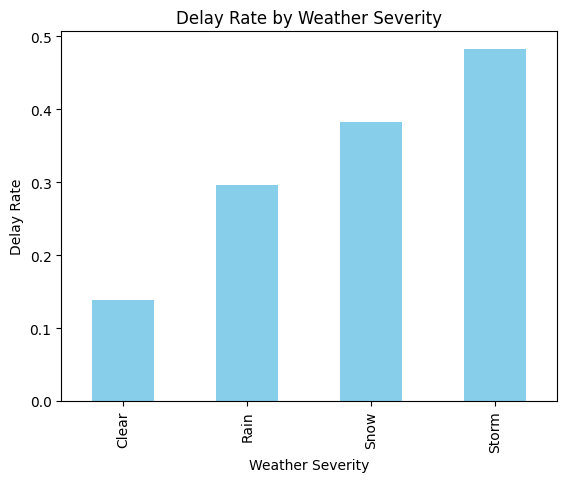

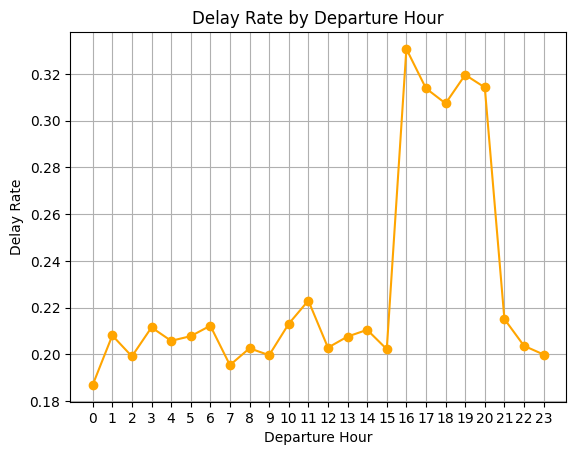

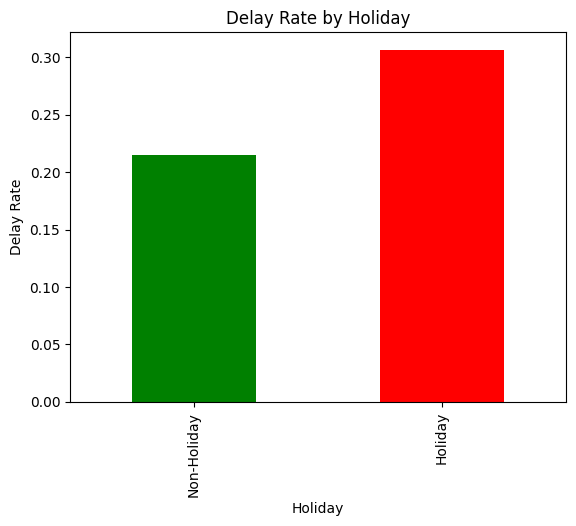

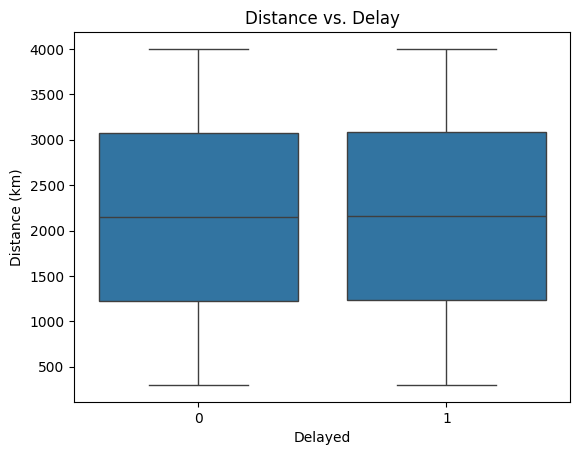

In [ ]:
# Delay rate by weather_severity
weather_delay_rate = data.groupby('weather_severity')['delayed'].mean()
weather_delay_rate.plot(kind='bar', title='Delay Rate by Weather Severity', ylabel='Delay Rate', xlabel='Weather Severity', color='skyblue')
plt.show()

# Delay rate by departure_hour
hourly_delay_rate = data.groupby('departure_hour')['delayed'].mean()
hourly_delay_rate.plot(kind='line', title='Delay Rate by Departure Hour', ylabel='Delay Rate', xlabel='Departure Hour', marker='o', color='orange')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

# Delay rate by holiday
holiday_delay_rate = data.groupby('holiday')['delayed'].mean()
holiday_delay_rate.index = ['Non-Holiday', 'Holiday']
holiday_delay_rate.plot(kind='bar', title='Delay Rate by Holiday', ylabel='Delay Rate', xlabel='Holiday', color=['green', 'red'])
plt.show()

# Distance vs. delay (boxplots)
sns.boxplot(x='delayed', y='distance_km', data=data)
plt.title('Distance vs. Delay')
plt.xlabel('Delayed')
plt.ylabel('Distance (km)')
plt.show()

In [ ]:
data.head()

flight_id    airline origin destination  departure_hour  day_of_week  \
0          1     Spirit    LAX         JFK               1            1   
1          2  Southwest    SEA         DEN               6            7   
2          3    JetBlue    ORD         SEA              14            6   
3          4     Spirit    DEN         JFK              13            1   
4          5   American    DFW         JFK              12            2   

   scheduled_duration_min  distance_km weather_severity  holiday  delayed  
0                     320          472             Rain        0        0  
1                      65         3537             Rain        0        0  
2                     250         2215            Clear        0        0  
3                     242         3748            Clear        0        0  
4                     270          539            Clear        0        0

In [ ]:
data.drop(columns=['flight_id'], inplace=True, errors='ignore')

data = pd.get_dummies(
    data,
    columns=['airline', 'origin', 'destination', 'weather_severity'],
    drop_first=True
)


In [ ]:
data.head()

departure_hour  day_of_week  scheduled_duration_min  distance_km  holiday  \
0               1            1                     320          472        0   
1               6            7                      65         3537        0   
2              14            6                     250         2215        0   
3              13            1                     242         3748        0   
4              12            2                     270          539        0   

   delayed  airline_American  airline_Delta  airline_JetBlue  \
0        0             False          False            False   
1        0             False          False            False   
2        0             False          False             True   
3        0             False          False            False   
4        0              True          False            False   

   airline_Southwest  ...  destination_DEN  destination_DFW  destination_JFK  \
0              False  ...            False            False             True   
1               True  ...             True            False            False   
2              False  ...            False            False            False   
3              False  ...            False            False             True   
4              False  ...            False            False             True   

   destination_LAX  destination_ORD  destination_SEA  destination_SFO  \
0            False            False            False            False   
1            False            False            False            False   
2            False            False             True            False   
3            False            False            False            False   
4            False            False            False            False   

   weather_severity_Rain  weather_severity_Snow  weather_severity_Storm  
0                   True                  False                   False  
1                   True                  False                   False  
2                  False                  False                   False  
3                  False                  False                   False  
4                  False                  False                   False  

[5 rows x 29 columns]

In [ ]:
data.head()

departure_hour  day_of_week  scheduled_duration_min  distance_km  holiday  \
0               1            1                     320          472        0   
1               6            7                      65         3537        0   
2              14            6                     250         2215        0   
3              13            1                     242         3748        0   
4              12            2                     270          539        0   

   delayed  airline_American  airline_Delta  airline_JetBlue  \
0        0             False          False            False   
1        0             False          False            False   
2        0             False          False             True   
3        0             False          False            False   
4        0              True          False            False   

   airline_Southwest  ...  destination_DEN  destination_DFW  destination_JFK  \
0              False  ...            False            False             True   
1               True  ...             True            False            False   
2              False  ...            False            False            False   
3              False  ...            False            False             True   
4              False  ...            False            False             True   

   destination_LAX  destination_ORD  destination_SEA  destination_SFO  \
0            False            False            False            False   
1            False            False            False            False   
2            False            False             True            False   
3            False            False            False            False   
4            False            False            False            False   

   weather_severity_Rain  weather_severity_Snow  weather_severity_Storm  
0                   True                  False                   False  
1                   True                  False                   False  
2                  False                  False                   False  
3                  False                  False                   False  
4                  False                  False                   False  

[5 rows x 29 columns]

In [ ]:


cols_to_standardize = ['departure_hour', 'scheduled_duration_min', 'distance_km']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform
data[cols_to_standardize] = scaler.fit_transform(data[cols_to_standardize])



In [ ]:
X = data.drop(columns=['delayed'])
y = data['delayed']

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Example for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10], 
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

c:\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python313\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver = _check_solver(self.solver, self.penalty, self.dua

Best Parameters: {'C': 1, 'penalty': 'l2'}


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression( C=1, penalty='l2')  # Handles class imbalance
model.fit(X_train, y_train)

LogisticRegression(C=1)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for AUC

# Metrics
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.74      7712
           1       0.75      0.69      0.72      7712

    accuracy                           0.73     15424
   macro avg       0.73      0.73      0.73     15424
weighted avg       0.73      0.73      0.73     15424

ROC AUC: 0.778515218105964
[[5893 1819]
 [2393 5319]]


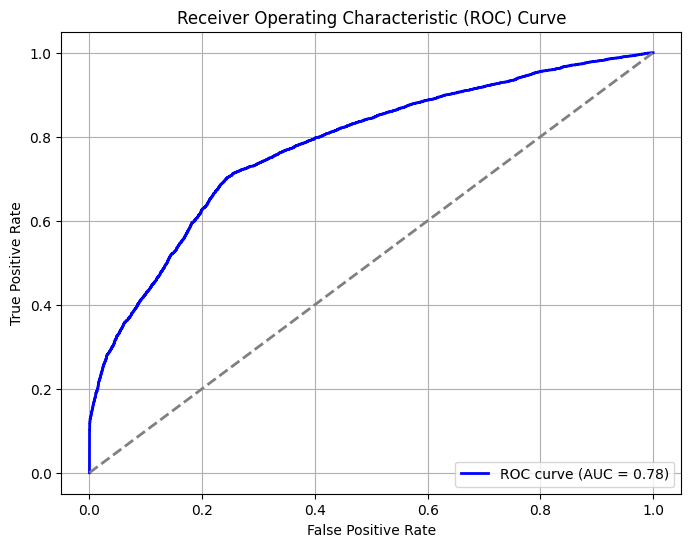

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
probs = model.predict_proba(X_test)[:,1]
y_pred = np.where(probs <= 0.36,0,1)    

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, probs))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.54      0.63      7712
           1       0.64      0.83      0.72      7712

    accuracy                           0.68     15424
   macro avg       0.70      0.68      0.68     15424
weighted avg       0.70      0.68      0.68     15424

ROC AUC: 0.778515218105964
[[4186 3526]
 [1342 6370]]


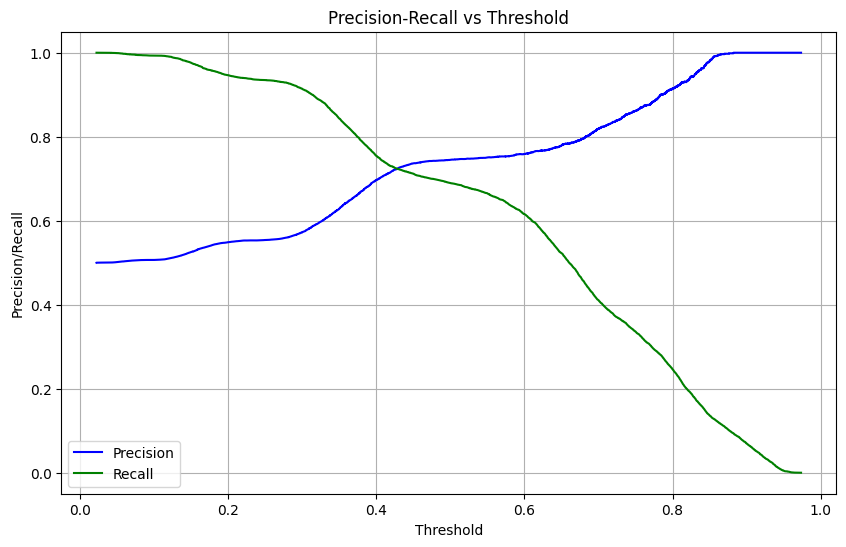

In [ ]:
from sklearn.metrics import precision_recall_curve
# Step 1: Get precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# Step 2: Plot Precision-Recall vs Threshold curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='b')
plt.plot(thresholds, recall[:-1], label='Recall', color='g')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid()
plt.show()

In [ ]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

KeyboardInterrupt: 

In [ ]:
from xgboost import XGBClassifier

# Initialize and train the model
xgb_model = XGBClassifier( n_estimators=200, max_depth=7, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Predictions
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for AUC

# Metrics
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      7712
           1       0.88      0.74      0.80      7712

    accuracy                           0.82     15424
   macro avg       0.83      0.82      0.82     15424
weighted avg       0.83      0.82      0.82     15424

ROC AUC: 0.8928505422384257
[[6896  816]
 [1998 5714]]


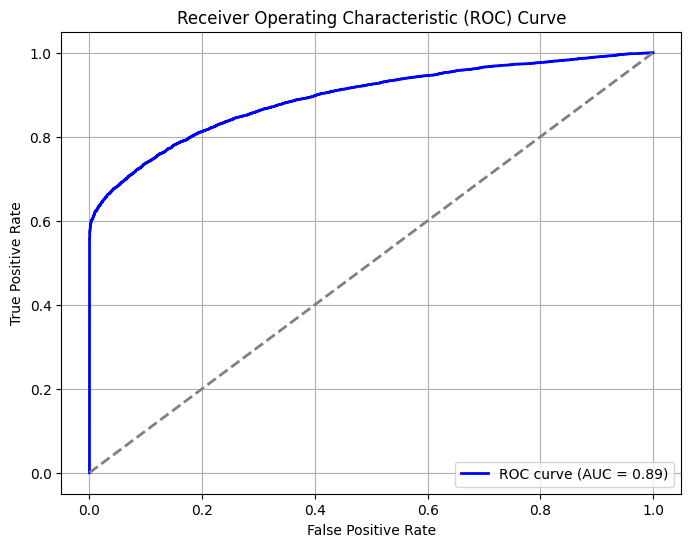

In [ ]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
probs = xgb_model.predict_proba(X_test)[:,1]
y_pred = np.where(probs <= 0.38,0,1) 

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      7712
           1       0.79      0.82      0.81      7712

    accuracy                           0.80     15424
   macro avg       0.80      0.80      0.80     15424
weighted avg       0.80      0.80      0.80     15424

ROC AUC: 0.8928505422384257
[[5995 1717]
 [1350 6362]]


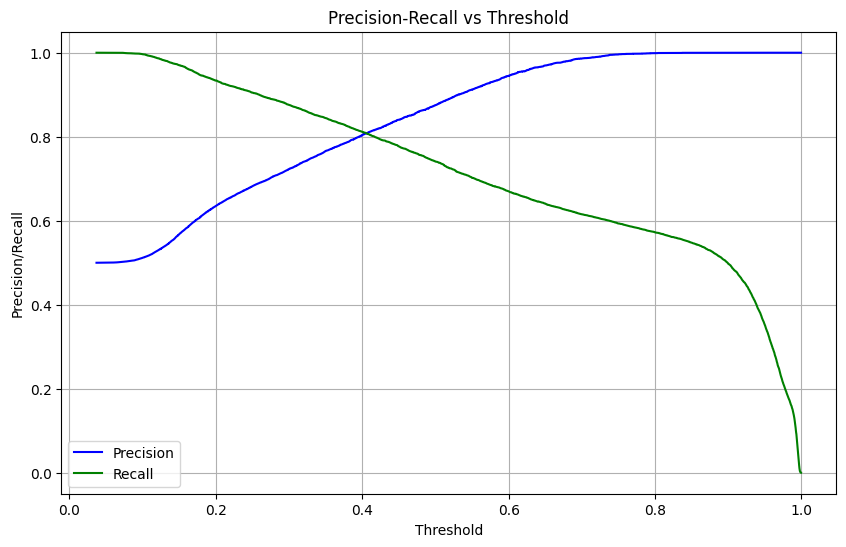

In [ ]:
from sklearn.metrics import precision_recall_curve
# Step 1: Get precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# Step 2: Plot Precision-Recall vs Threshold curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='b')
plt.plot(thresholds, recall[:-1], label='Recall', color='g')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Example for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf=1)
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Predictions
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for AUC

# Metrics
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      7712
           1       0.83      0.85      0.84      7712

    accuracy                           0.84     15424
   macro avg       0.84      0.84      0.84     15424
weighted avg       0.84      0.84      0.84     15424

ROC AUC: 0.9191153757118292
[[6360 1352]
 [1159 6553]]


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Predictions
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for AUC

# Metrics
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      7712
           1       0.83      0.85      0.84      7712

    accuracy                           0.84     15424
   macro avg       0.84      0.84      0.84     15424
weighted avg       0.84      0.84      0.84     15424

ROC AUC: 0.9191153757118292
[[6360 1352]
 [1159 6553]]


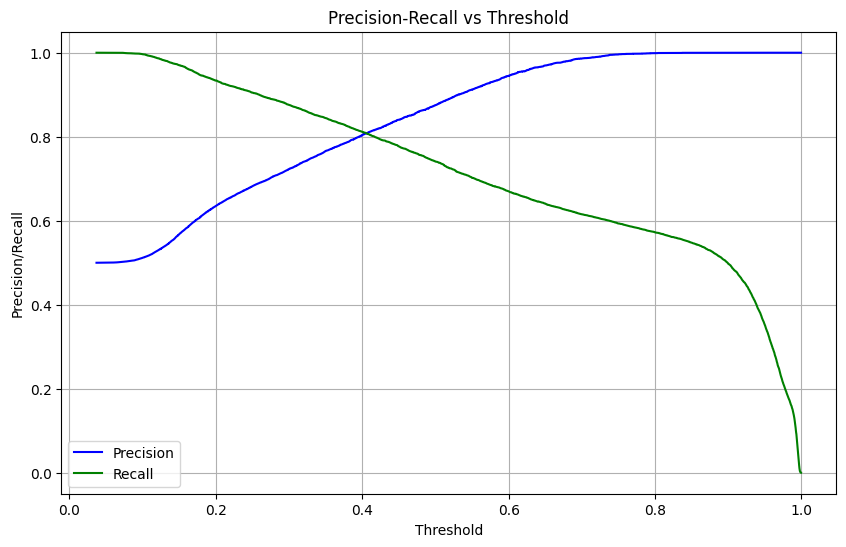

In [ ]:
from sklearn.metrics import precision_recall_curve
# Step 1: Get precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# Step 2: Plot Precision-Recall vs Threshold curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='b')
plt.plot(thresholds, recall[:-1], label='Recall', color='g')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid()
plt.show()

In [ ]:
probs = rf_model.predict_proba(X_test)[:,1]
y_pred = np.where(probs <= 0.38,0,1)    # lower threshold to catch more positives

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.69      0.78      7712
           1       0.75      0.92      0.82      7712

    accuracy                           0.80     15424
   macro avg       0.82      0.80      0.80     15424
weighted avg       0.82      0.80      0.80     15424

ROC AUC: 0.9191153757118292
[[5302 2410]
 [ 641 7071]]


In [ ]:
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(LGBMClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

[LightGBM] [Info] Number of positive: 24678, number of negative: 24678
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 49356, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

In [ ]:
# Initialize and train the model
lgbm_model = LGBMClassifier(n_estimators=200, max_depth=7, learning_rate=0.1, subsample=0.8, colsample_bytree=1.0)
lgbm_model.fit(X_train, y_train)

# Predictions
y_pred = lgbm_model.predict(X_test)
y_proba = lgbm_model.predict_proba(X_test)[:, 1]  # Probabilities for AUC

# Metrics
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(confusion_matrix(y_test, y_pred))

[LightGBM] [Info] Number of positive: 30848, number of negative: 30848
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 61696, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
              precision    recall  f1-score   support

           0       0.78      0.93      0.85      7712
           1       0.91      0.74      0.81      7712

    accuracy                           0.83     15424
   macro avg       0.84      0.83      0.83     15424
weighted avg       0.84      0.83      0.83     15424

ROC AUC: 0.9009849677201882
[[7136  576]
 [2026 5686]]


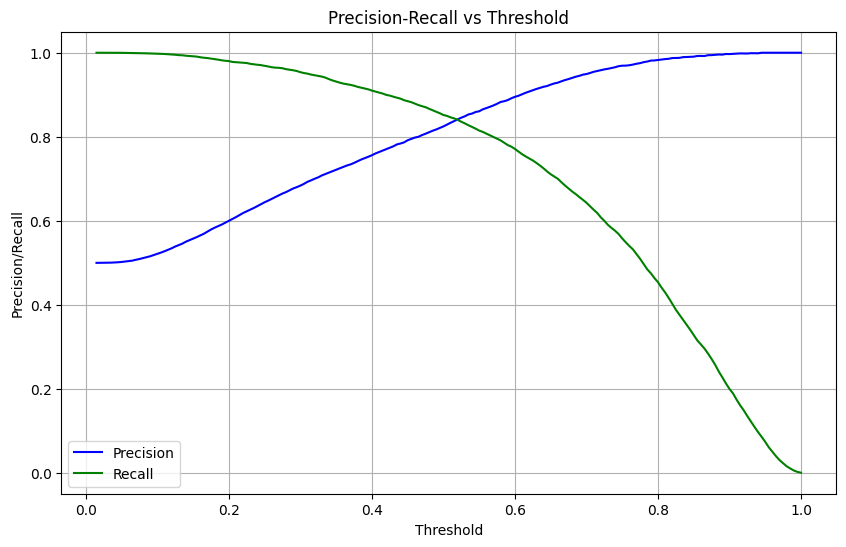

In [ ]:
from sklearn.metrics import precision_recall_curve
# Step 1: Get precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# Step 2: Plot Precision-Recall vs Threshold curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='b')
plt.plot(thresholds, recall[:-1], label='Recall', color='g')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid()
plt.show()

In [ ]:
probs = lgbm_model.predict_proba(X_test)[:,1]
y_pred = np.where(probs <= 0.43,0,1)    # lower threshold to catch more positives

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      7712
           1       0.85      0.79      0.82      7712

    accuracy                           0.83     15424
   macro avg       0.83      0.83      0.83     15424
weighted avg       0.83      0.83      0.83     15424

ROC AUC: 0.9009849677201882
[[6679 1033]
 [1656 6056]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 1. Models
rf_model = RandomForestClassifier(random_state=42)

from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(random_state=42)

# 2. Hyperparameter tuning
param_dist_xgb = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
}

param_dist_lgbm = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Tune XGB
xgb_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_dist_xgb,
    n_iter=10, scoring='f1', cv=cv, n_jobs=-1, random_state=42
)
xgb_search.fit(X_train, y_train)
xgb_model = xgb_search.best_estimator_

# Tune LightGBM
lgbm_search = RandomizedSearchCV(
    lgbm_model, param_distributions=param_dist_lgbm,
    n_iter=10, scoring='f1', cv=cv, n_jobs=-1, random_state=42
)
lgbm_search.fit(X_train, y_train)
lgbm_model = lgbm_search.best_estimator_

# 3. Calibrate models
xgb_model = CalibratedClassifierCV(xgb_model, method='isotonic', cv=cv).fit(X_train, y_train)
lgbm_model = CalibratedClassifierCV(lgbm_model, method='isotonic', cv=cv).fit(X_train, y_train)

# 4. Cross-validation
classifiers = {
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'LightGBM': lgbm_model,
}

scoring = ['roc_auc', 'f1', 'precision', 'recall']

for name, clf in classifiers.items():
    print(f"\n=== {name} ===")
    cv_results = cross_validate(
        clf, X_train, y_train,
        cv=cv,
        scoring=scoring,
        return_estimator=True,
        n_jobs=-1
    )
    for metric in scoring:
        mean = cv_results[f'test_{metric}'].mean()
        std  = cv_results[f'test_{metric}'].std()
        print(f"{metric:10s}  {mean:.3f} ± {std:.3f}")

# 5. Fit models on full train
rf_model.fit(X_train, y_train)

# 6. Voting Classifier (weighted)
vc = VotingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('lgbm', lgbm_model)],
    voting='soft',
    weights=[3, 1, 1],   # RF has more influence
    n_jobs=-1
)
vc.fit(X_train, y_train)

# 7. Evaluate Voting Classifier
y_pred = vc.predict(X_test)
y_proba = vc.predict_proba(X_test)[:, 1]

print("\n=== Voting Classifier ===")
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(confusion_matrix(y_test, y_pred))




c:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:28:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 30848, number of negative: 30848
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 61696, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

c:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:28:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:28:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:28:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:29:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python313\Lib\sit

[LightGBM] [Info] Number of positive: 24678, number of negative: 24678
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 49356, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

In [ ]:
# 8. (Optional) Stacking Classifier
stack = StackingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('lgbm', lgbm_model)
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    cv=cv,
    passthrough=True
)
stack.fit(X_train, y_train)

y_pred_stack = stack.predict(X_test)
y_proba_stack = stack.predict_proba(X_test)[:, 1]

print("\n=== Stacking Classifier ===")
print(classification_report(y_test, y_pred_stack))
print("ROC AUC:", roc_auc_score(y_test, y_proba_stack))
print(confusion_matrix(y_test, y_pred_stack))

# 9. (Optional) Threshold Tuning for Voting Classifier
print("\n=== Threshold Tuning (Voting Classifier) ===")
thresholds = np.linspace(0.1, 0.9, 81)
f1_scores = []

for thresh in thresholds:
    preds = (y_proba >= thresh).astype(int)
    f1 = f1_score(y_test, preds)
    f1_scores.append((thresh, f1))

best_thresh, best_f1 = max(f1_scores, key=lambda x: x[1])
print(f"Best Threshold: {best_thresh:.2f}, Best F1: {best_f1:.3f}")

# Apply best threshold
y_pred_thresh = (y_proba >= best_thresh).astype(int)
print(classification_report(y_test, y_pred_thresh))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(confusion_matrix(y_test, y_pred_thresh))

c:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:31:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:31:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:31:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:31:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python313\Lib\sit

[LightGBM] [Info] Number of positive: 24678, number of negative: 24678
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 49356, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

c:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:32:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:32:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:32:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:32:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python313\Lib\sit

[LightGBM] [Info] Number of positive: 19742, number of negative: 19742
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 39484, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

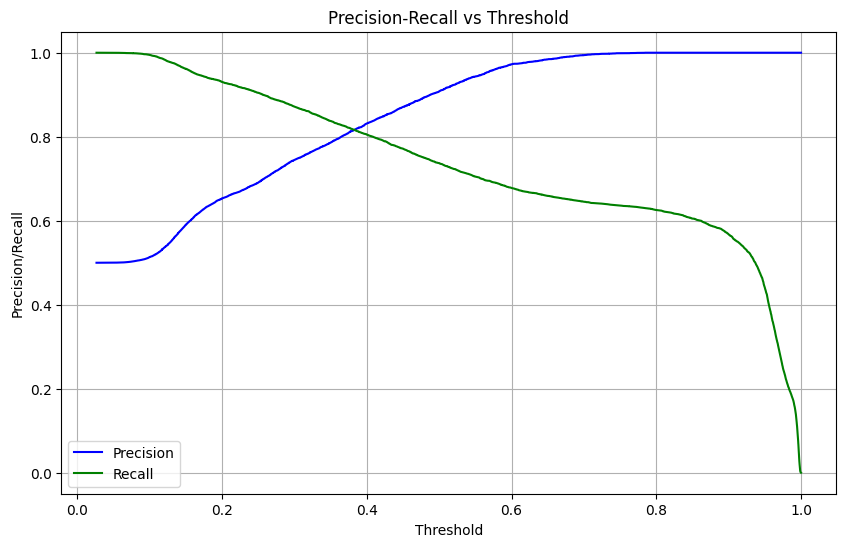

In [ ]:
from sklearn.metrics import precision_recall_curve
# Step 1: Get precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# Step 2: Plot Precision-Recall vs Threshold curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='b')
plt.plot(thresholds, recall[:-1], label='Recall', color='g')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid()
plt.show()

In [ ]:
probs = vc.predict_proba(X_test)[:,1]
y_pred = np.where(probs <= 0.4,0,1)    # lower threshold to catch more positives

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      7712
           1       0.79      0.90      0.84      7712

    accuracy                           0.83     15424
   macro avg       0.84      0.83      0.83     15424
weighted avg       0.84      0.83      0.83     15424

ROC AUC: 0.932838238569842
[[5922 1790]
 [ 780 6932]]


In [ ]:
normal = data[data['delayed'] == 0]
delayed =  data[data['delayed'] == 1]

delayed.shape

(11440, 29)

In [ ]:
normal_samp = normal.sample(n=11440)

new_data = pd.concat([normal_samp, delayed], axis=0)

new_data['delayed'].value_counts()

delayed
0    11440
1    11440
Name: count, dtype: int64

In [ ]:
new_data.head()

departure_hour  day_of_week  scheduled_duration_min  distance_km  \
15747       -0.507581            4                1.077613    -0.799410   
38520        1.661754            6               -0.715623    -1.446288   
42571       -1.664559            6               -1.537041    -1.468755   
21613       -1.086070            5                0.429734     0.005676   
37432       -0.652203            2               -1.444487    -0.100108   

       holiday  delayed  airline_American  airline_Delta  airline_JetBlue  \
15747        0        0              True          False            False   
38520        0        0             False          False            False   
42571        0        0             False           True            False   
21613        0        0              True          False            False   
37432        0        0             False          False            False   

       airline_Southwest  ...  destination_DEN  destination_DFW  \
15747              False  ...            False            False   
38520              False  ...             True            False   
42571              False  ...             True            False   
21613              False  ...            False             True   
37432              False  ...            False            False   

       destination_JFK  destination_LAX  destination_ORD  destination_SEA  \
15747            False            False             True            False   
38520            False            False            False            False   
42571            False            False            False            False   
21613            False            False            False            False   
37432             True            False            False            False   

       destination_SFO  weather_severity_Rain  weather_severity_Snow  \
15747            False                  False                  False   
38520            False                  False                  False   
42571            False                  False                  False   
21613            False                  False                  False   
37432            False                  False                  False   

       weather_severity_Storm  
15747                   False  
38520                    True  
42571                   False  
21613                    True  
37432                   False  

[5 rows x 29 columns]

In [ ]:
# =========================
# 1. Features and target
# =========================
x = new_data.drop(columns=['delayed'])
y = new_data['delayed']

# =========================
# 2. Define classifiers
# =========================
classifer = {
    'xgb': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'rf': RandomForestClassifier(),
    'lgbm': LGBMClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000)
}

# =========================
# 3. Cross-Validation
# =========================
from sklearn.model_selection import StratifiedKFold, cross_validate

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scoring = ['roc_auc', 'f1', 'precision', 'recall']

for name, clf in classifer.items():
    print(f"\n=== {name} ===")
    cv_results = cross_validate(
        clf, x, y,
        cv=cv,
        scoring=scoring,
        return_estimator=True,   # we’ll grab feature-importances later if needed
        n_jobs=-1
    )
    for metric in scoring:
        mean = cv_results[f'test_{metric}'].mean()
        std  = cv_results[f'test_{metric}'].std()
        print(f"{metric:10s}  {mean:.3f} ± {std:.3f}")

# =========================
# 4. (Optional) Final model evaluation on held-out test set
# =========================
# ONLY IF you still want a separate train/test split for a final sanity check
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

best_model = LGBMClassifier()   # suppose LGBM performed best in CV
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("\nFinal Test Set Evaluation (LGBM)")
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(confusion_matrix(y_test, y_pred))



=== xgb ===
roc_auc     0.668 ± 0.008
f1          0.626 ± 0.006
precision   0.626 ± 0.007
recall      0.626 ± 0.010

=== rf ===
roc_auc     0.675 ± 0.010
f1          0.631 ± 0.010
precision   0.634 ± 0.009
recall      0.628 ± 0.013

=== lgbm ===
roc_auc     0.696 ± 0.010
f1          0.657 ± 0.011
precision   0.639 ± 0.011
recall      0.675 ± 0.015

=== LogisticRegression ===
roc_auc     0.694 ± 0.011
f1          0.647 ± 0.007
precision   0.654 ± 0.007
recall      0.641 ± 0.010
[LightGBM] [Info] Number of positive: 9163, number of negative: 9141
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002257 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 583
[LightGBM] [Info] Number of data points in the train set: 18304, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500601 -> initscore=0.002404
[LightGBM] [Info] Start training from score 0.002404

Final Test Set Evaluation (

In [ ]:
best_model = StackingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('lgbm', lgbm_model)
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    cv=cv,
    passthrough=True
)
best_model.fit(x, y)

import joblib
joblib.dump(best_model, 'flight_delay_prediction.pkl')

c:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:37:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:37:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:37:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:37:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python313\Lib\sit

[LightGBM] [Info] Number of positive: 9152, number of negative: 9152
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 584
[LightGBM] [Info] Number of data points in the train set: 18304, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

c:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:38:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:38:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:38:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:38:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python313\Lib\sit

[LightGBM] [Info] Number of positive: 8237, number of negative: 8236
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001860 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 583
[LightGBM] [Info] Number of data points in the train set: 16473, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500030 -> initscore=0.000121
[LightGBM] [Info] Start training from score 0.000121
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

['flight_delay_prediction.pkl']

In [ ]:
model = joblib.load('flight_delay_prediction.pkl')

model.predict([[]])
